# BT4012 Without Text Analysis

### Setting up the environment

In [1]:
# libraries importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# setting up
# import packages here
# from google.colab import drive
# drive.mount('/content/drive')
# url = '/content/drive/MyDrive/fake_job_postings.csv'

# import from github repo
url = 'https://raw.githubusercontent.com/LordZhiHao/BT4012_Fraud_Analytics_Project/main/fake_job_postings.csv'

# read data
data = pd.read_csv(url)
df = data.copy()
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Exploratory Data Analysis - Univariate Analysis

First of all, lets perform some univariate data analysis on the data, such that we can attain more insights to the dataset

##### First Let's have an overview of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
df.describe(include='all')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880.000000,17880,17534,6333,2868,14572,17879,15184,10668,17880.000000,17880.000000,17880.000000,14409,10830,9775,12977,11425,17880.000000
unique,NaN,11231,3105,1337,874,1709,14801,11967,6204,NaN,NaN,NaN,5,7,13,131,37,NaN
top,NaN,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,NaN
freq,NaN,311,718,551,142,726,379,410,726,NaN,NaN,NaN,11620,3809,5145,1734,1749,NaN
mean,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,0.491723,NaN,NaN,NaN,NaN,NaN,0.048434
std,5161.655742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,0.499945,NaN,NaN,NaN,NaN,NaN,0.214688
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4470.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,13410.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


The majority of the columns are of datatype object (string), and some columns are integers (binary)

In [7]:
data.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

From the table, we notice the presence of NA values in majority of the columns. Only job_id, title, telecommuting, has_company_logo, has_questions and fraudulent have no NA values.

##### Let's take a look at the distribution of the target variable - fraudulent

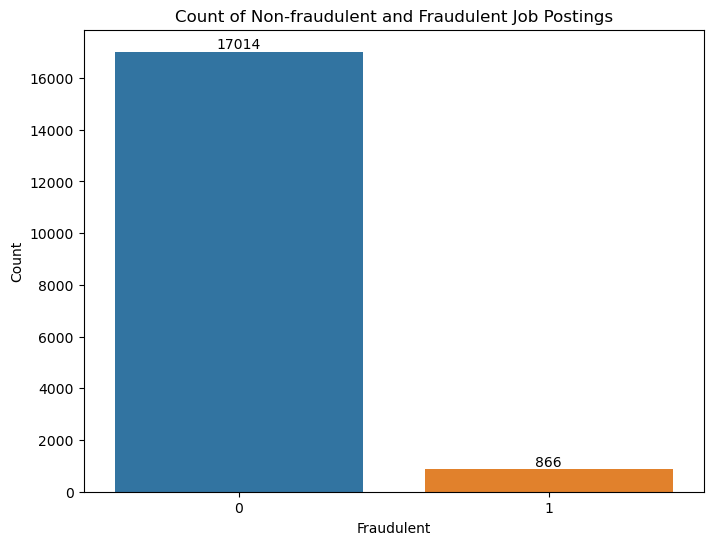

In [3]:
# analyse fraudulent column

# Assuming 'fraudulent' is a binary column (0 for non-fraudulent, 1 for fraudulent)
fraudulent_counts = data.groupby('fraudulent')['fraudulent'].count()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=fraudulent_counts.index, y=fraudulent_counts.values)

# Adding labels and title
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Count of Non-fraudulent and Fraudulent Job Postings')

# Adding text labels on top of each bar
for i, count in enumerate(fraudulent_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()


From the plot, we notice that the target variable is very imbalanced. Therefore, we should keep in mind this feature of the data, and focus more on the f1-score and recall evaluation of the models. 

##### Let's take a look at the distribution of the industry variable 

                                Industry  Count
0    Information Technology and Services   1734
1                      Computer Software   1376
2                               Internet   1062
3              Marketing and Advertising    828
4                   Education Management    822
..                                   ...    ...
126                         Shipbuilding      1
127                       Sporting Goods      1
128             Museums and Institutions      1
129                     Wine and Spirits      1
130                             Ranching      1

[131 rows x 2 columns]


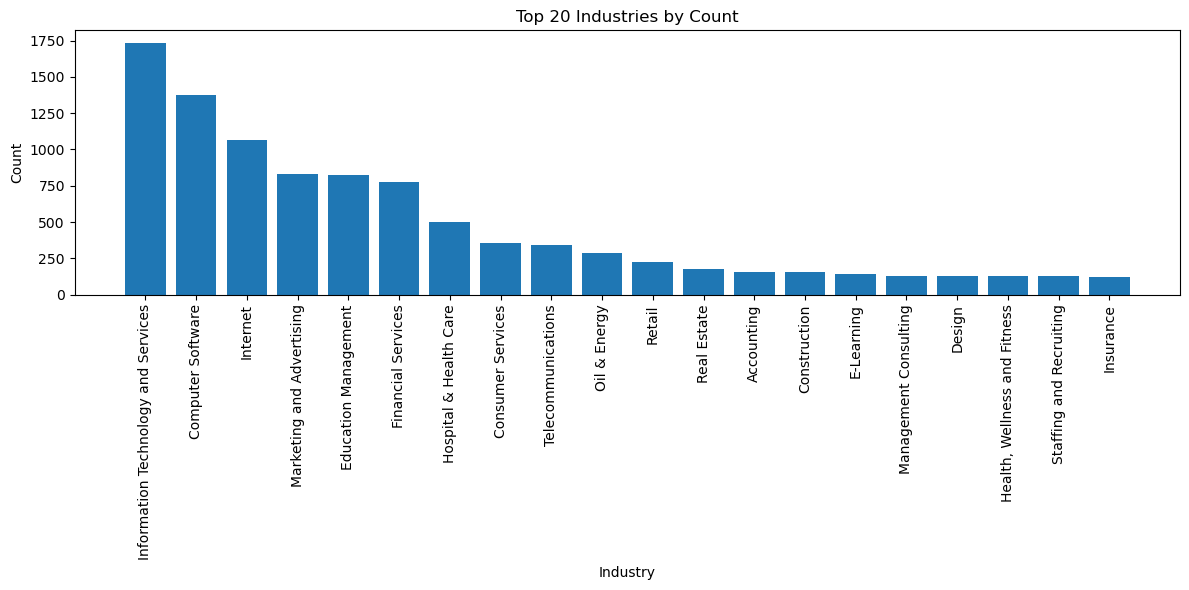

In [8]:
# Group by 'Department' and count the occurrences
industry_counts = data['industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Count']

print(industry_counts)

# Select the top 20 industry
top_20_industry = industry_counts.head(20)

# Create a bar plot for the top 20 departments
plt.figure(figsize=(12, 6))
plt.bar(top_20_industry['Industry'], top_20_industry['Count'])
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Top 20 Industries by Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

In total, there are 131 distinct departments available in the data. However, many departments are distinct and have very low occurences. Information Technology and Services, Computer Software and Internet are the top 3 departments listed in the dataset.

##### Let's take a look at the distribution of the location variable - In particular, the country of the jobs

   Location  Count
0        US  10656
1        GB   2384
2        GR    940
3        CA    457
4        DE    383
..      ...    ...
86       SI      1
87       CO      1
88       SD      1
89       UG      1
90       KH      1

[91 rows x 2 columns]


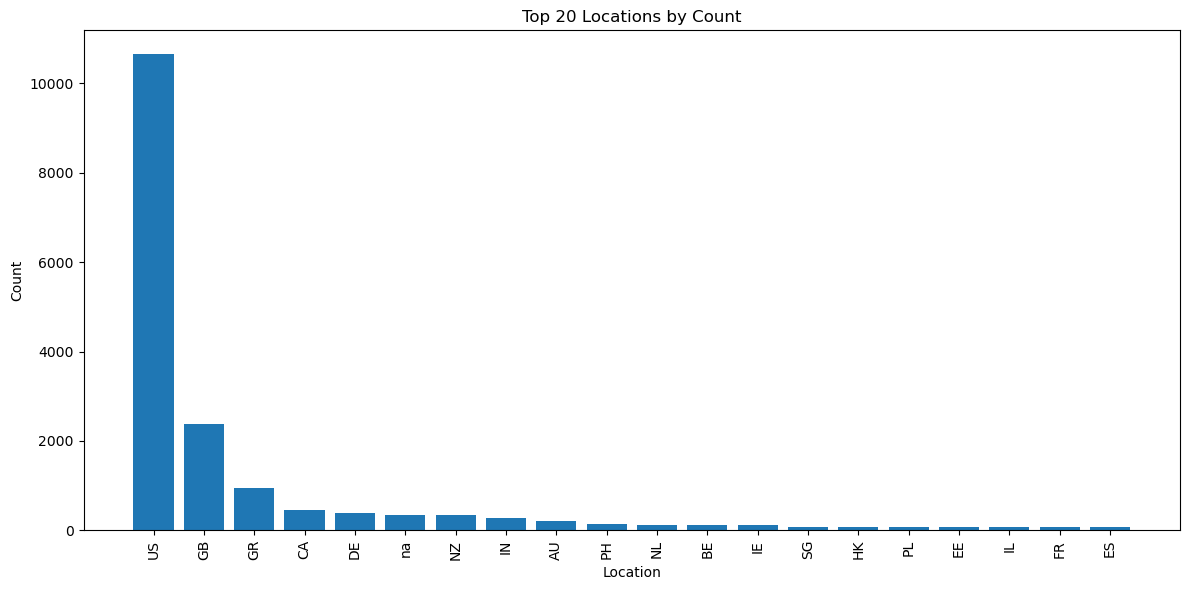

In [9]:
# Group by 'location' and count the occurrences
location_counts = (data['location'].apply(lambda x:str(x)[0:2])).value_counts().reset_index()
location_counts.columns = ['Location', 'Count']

print(location_counts)

# Select the top 20 Location
top_20_location = location_counts.head(20)

# Create a bar plot for the top 20 departments
plt.figure(figsize=(12, 6))
plt.bar(top_20_location['Location'], top_20_location['Count'])
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 20 Locations by Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

In total, the jobs are listed at locations from 90 distinct countries in the data. However, jobs from many countries are unique and have very low occurences. Majority of the jobs come from US, and Great Britian and Greece come in second and third.

##### Let's take a look at the distribution of the department variable 

                                       Department  Count
0                                           Sales    551
1                                     Engineering    487
2                                       Marketing    401
3                                      Operations    270
4                                              IT    225
...                                           ...    ...
1332  Commercial Management / Contract Management      1
1333                                         Exec      1
1334                                      Marcomm      1
1335                                          CRM      1
1336                                  Hospitality      1

[1337 rows x 2 columns]


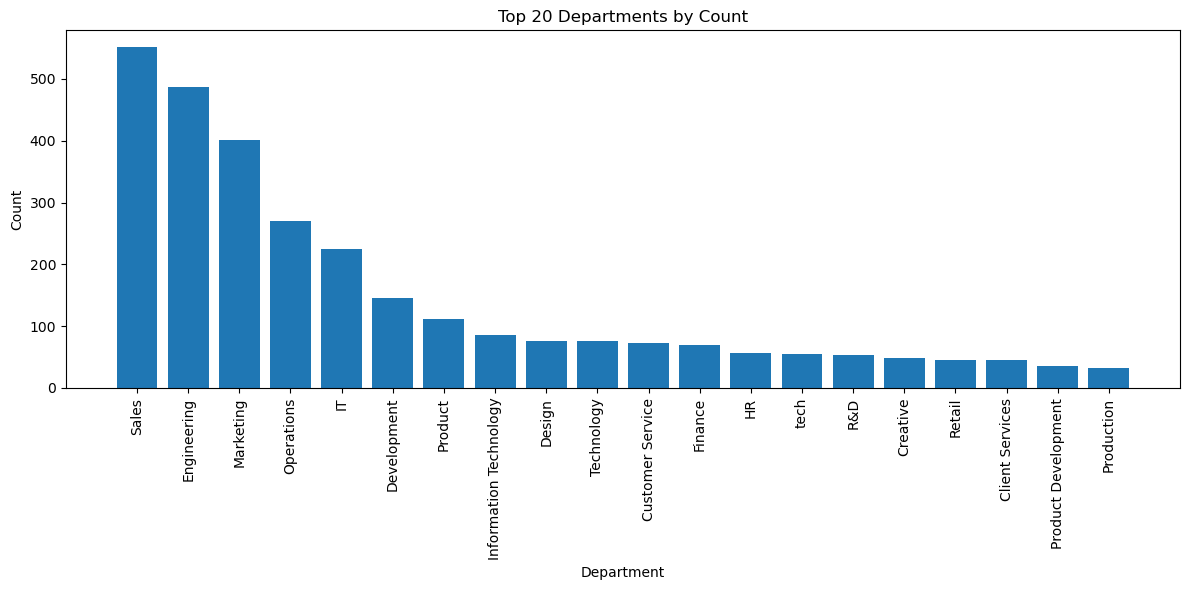

In [10]:
# Group by 'Department' and count the occurrences
department_counts = data['department'].value_counts().reset_index()
department_counts.columns = ['Department', 'Count']

print(department_counts)

# Select the top 20 departments
top_20_departments = department_counts.head(20)

# Create a bar plot for the top 20 departments
plt.figure(figsize=(12, 6))
plt.bar(top_20_departments['Department'], top_20_departments['Count'])
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Top 20 Departments by Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

In total, there are jobs from 1,337 distinct departments in the data. However, similar to industry and country, many departments are unique and have very low number of occurences. Majority of the jobs come from Sales, Engineering and Marketing.

##### Let's take a look at the distribution of the employment type variable 

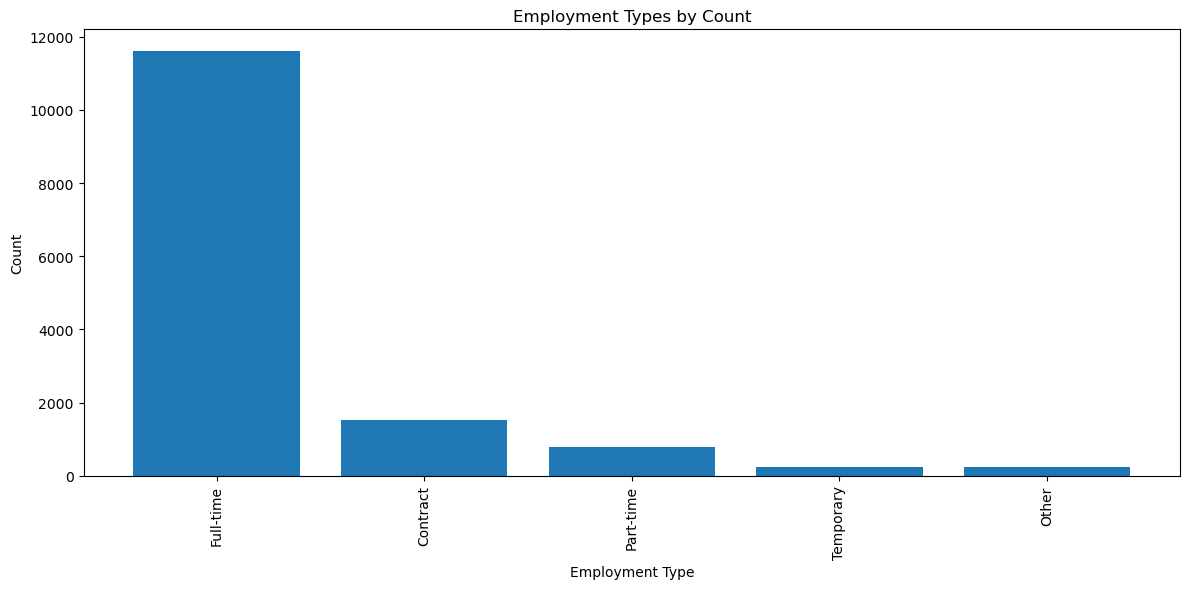

In [11]:
# Group by 'employment_type' and count the occurrences
employment_type_counts = data['employment_type'].value_counts().reset_index()
employment_type_counts.columns = ['Employment Type', 'Count']

# Create a bar plot for the top 20 employment types
plt.figure(figsize=(12, 6))
plt.bar(employment_type_counts['Employment Type'], employment_type_counts['Count'])
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Employment Types by Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

In total, there are five types of employment - Full-time, Contract, Part-Time, Temporary and Other. Majority of the jobs are Full-time.

##### Let's take a look at the distribution of the Required experience variable 

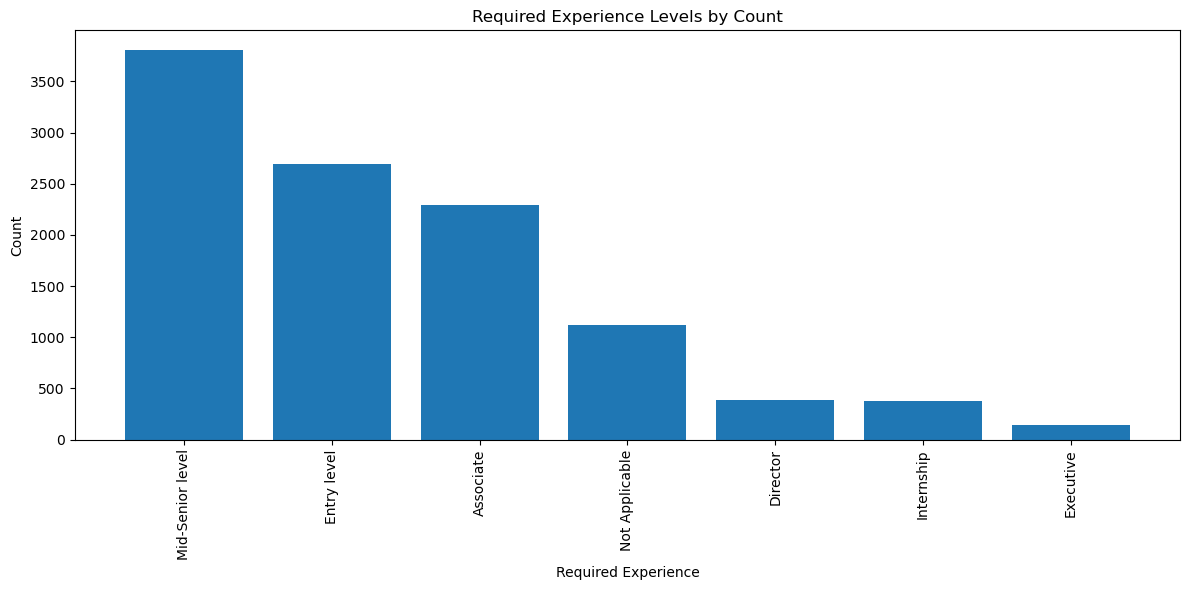

In [12]:
# Group by 'required_experience' and count the occurrences
required_experience_counts = data['required_experience'].value_counts().reset_index()
required_experience_counts.columns = ['Required Experience', 'Count']

# Create a bar plot for the top 20 required experience levels
plt.figure(figsize=(12, 6))
plt.bar(required_experience_counts['Required Experience'], required_experience_counts['Count'])
plt.xlabel('Required Experience')
plt.ylabel('Count')
plt.title('Required Experience Levels by Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

In total, there are seven types of required experience - Mid-Senior Level, Entry Level, Associate, Director, Internship, Executive and Not Applicable. Majority of the jobs are Mid-Senior Level, Entry Level and Associate. There is a significant proportion of Not Applicable class as well which is worth noticing. 

##### Let's take a look at the distribution of the Required education variable 

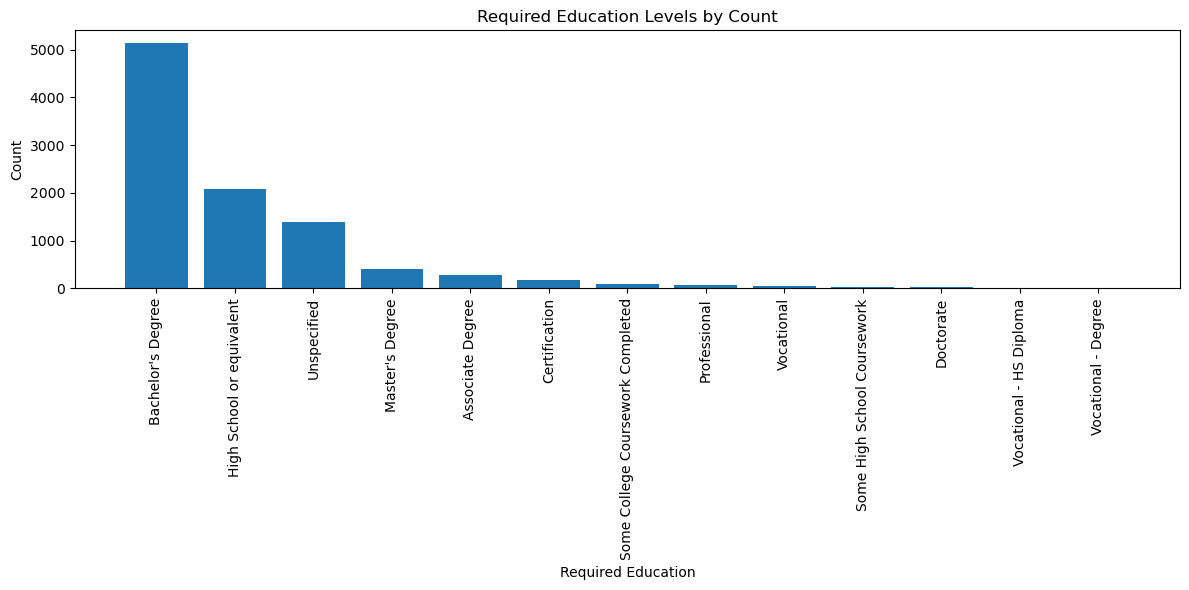

In [13]:
# Group by 'required_education' and count the occurrences
required_education_counts = data['required_education'].value_counts().reset_index()
required_education_counts.columns = ['Required Education', 'Count']

# Create a bar plot for the top 20 required education levels
plt.figure(figsize=(12, 6))
plt.bar(required_education_counts['Required Education'], required_education_counts['Count'])
plt.xlabel('Required Education')
plt.ylabel('Count')
plt.title('Required Education Levels by Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

In total, there are 13 types of required education - Bachelor's Degree, Master's Degree, High School or equivalent, Unspecified, Some College Coursework Completed, Vocational, Certification, Associate Degree, Professional, Doctorate, Some High School Coursework, Vocational - Degree, Vocational - HS Diploma. Majority of the jobs require Bachelor's Degree, High School or equivalent and Master's Degre. There is a significant proportion of Unspecified class as well which is worth noticing. 

##### Let's take a look at the distribution of the functions variable 

                  Function  Count
0   Information Technology   1749
1                    Sales   1468
2              Engineering   1348
3         Customer Service   1229
4                Marketing    830
5           Administrative    630
6                   Design    340
7     Health Care Provider    338
8                    Other    325
9                Education    325
10              Management    317
11    Business Development    228
12     Accounting/Auditing    212
13         Human Resources    205
14      Project Management    183
15                 Finance    172
16              Consulting    144
17         Writing/Editing    132
18            Art/Creative    132
19              Production    116
20      Product Management    114
21       Quality Assurance    111
22             Advertising     90
23        Business Analyst     84
24            Data Analyst     82
25        Public Relations     76
26           Manufacturing     74
27        General Business     68
28            

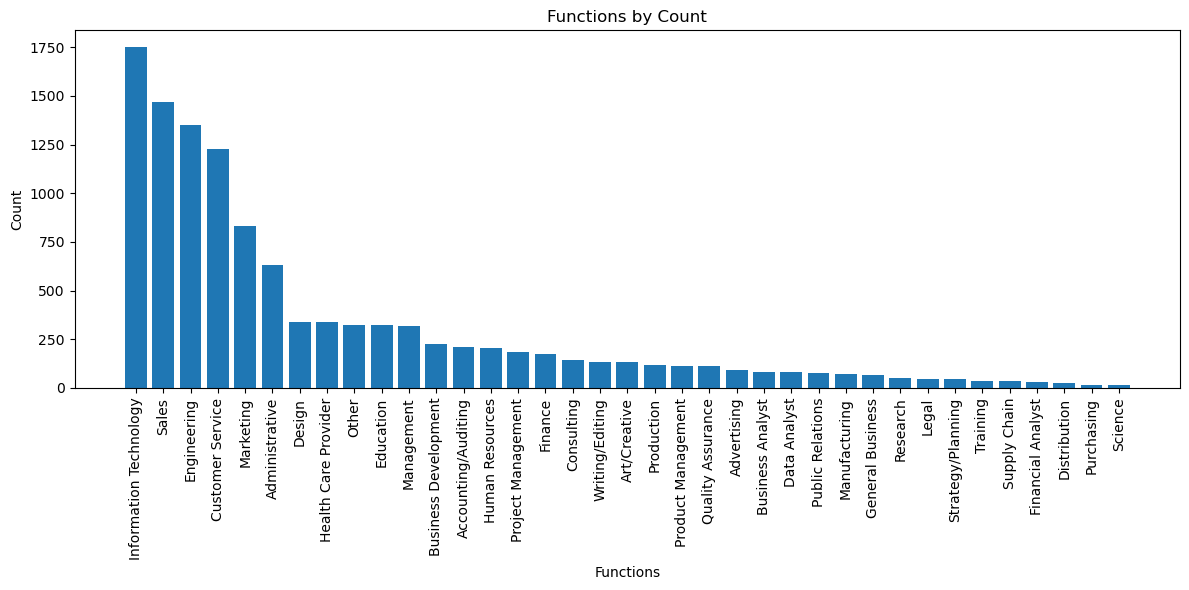

In [16]:
# Group by 'required_education' and count the occurrences
function_counts = data['function'].value_counts().reset_index()
function_counts.columns = ['Function', 'Count']

print(function_counts)

# Create a bar plot for the top 20 required education levels
plt.figure(figsize=(12, 6))
plt.bar(function_counts['Function'], function_counts['Count'])
plt.xlabel('Functions')
plt.ylabel('Count')
plt.title('Functions by Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

In total, there are 36 distinct functions available in the data. Information Technology, Sales and Engineering are the top 3 functions listed in the dataset. In particular, we do notice that the functions are similarly named with the variables in the department and industry columns. 

## Exploratory Data Analysis - Bivariate Analysis

Next, after looking into each columns, we look at the relationship between multiple columns to check if there are any underlying relationships between the columns

##### Next, we look at the binary variables in the dataset - Telecommuting, has_company_logo and has_questions

   Occurrences (Telecommuting)  Percentage of Fraudulent (Telecommuting)  \
0                        17113                                  4.686496   
1                          767                                  8.344198   

   Occurrences (Company Logo)  Percentage of Fraudulent (Company Logo)  \
0                        3660                                15.928962   
1                       14220                                 1.990155   

   Occurrences (Questions)  Percentage of Fraudulent (Questions)  
0                     9088                              6.778169  
1                     8792                              2.843494  


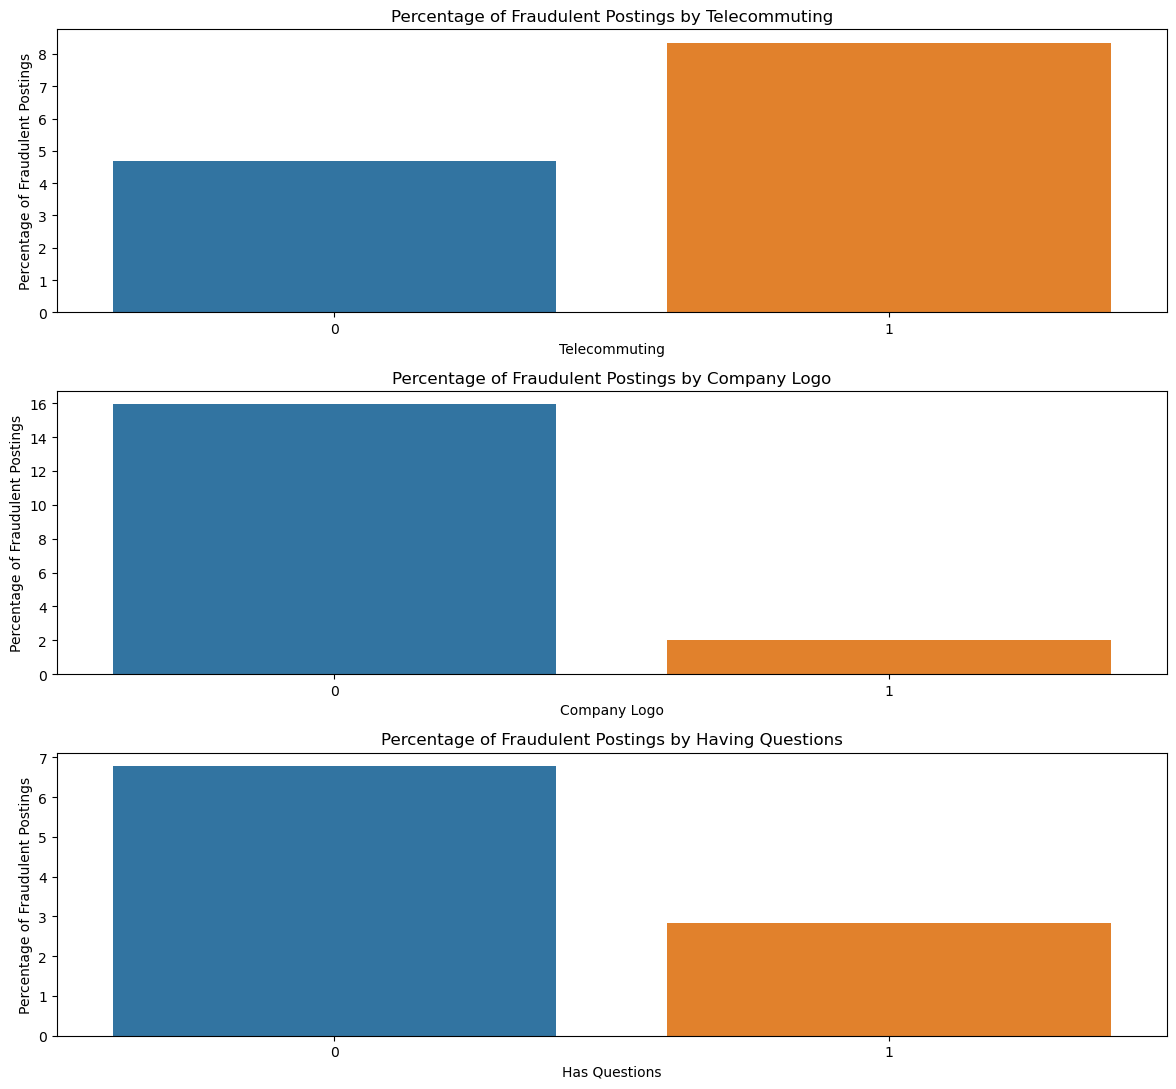

In [17]:
# Calculate the percentage of fraud for the 'Telecommuting' column
telecommuting_fraud = data.groupby('telecommuting')['fraudulent'].mean() * 100

# Calculate the percentage of fraud for the 'Company Logo' column
company_logo_fraud = data.groupby('has_company_logo')['fraudulent'].mean() * 100

# Calculate the percentage of fraud for the 'Questions' column
questions_fraud = data.groupby('has_questions')['fraudulent'].mean() * 100

# Calculate the number of occurrences for each binary value
telecommuting_occurrences = data['telecommuting'].value_counts()
company_logo_occurrences = data['has_company_logo'].value_counts()
questions_occurrences = data['has_questions'].value_counts()

# Create bar plots to visualize the percentage of fraud for each binary value
plt.figure(figsize=(12, 11))

# Telecommuting
plt.subplot(3, 1, 1)
sns.barplot(x=telecommuting_fraud.index, y=telecommuting_fraud.values)
plt.xlabel('Telecommuting')
plt.ylabel('Percentage of Fraudulent Postings')
plt.title('Percentage of Fraudulent Postings by Telecommuting')

# Company Logo
plt.subplot(3, 1, 2)
sns.barplot(x=company_logo_fraud.index, y=company_logo_fraud.values)
plt.xlabel('Company Logo')
plt.ylabel('Percentage of Fraudulent Postings')
plt.title('Percentage of Fraudulent Postings by Company Logo')

# Questions
plt.subplot(3, 1, 3)
sns.barplot(x=questions_fraud.index, y=questions_fraud.values)
plt.xlabel('Has Questions')
plt.ylabel('Percentage of Fraudulent Postings')
plt.title('Percentage of Fraudulent Postings by Having Questions')

plt.tight_layout()

# Print the results for occurrences and percentage of fraudulent
result = pd.DataFrame({
    'Occurrences (Telecommuting)': telecommuting_occurrences,
    'Percentage of Fraudulent (Telecommuting)': telecommuting_fraud,
    'Occurrences (Company Logo)': company_logo_occurrences,
    'Percentage of Fraudulent (Company Logo)': company_logo_fraud,
    'Occurrences (Questions)': questions_occurrences,
    'Percentage of Fraudulent (Questions)': questions_fraud
})

print(result)

# Display the plots
plt.show()

From our observations, we can see that all three binary variables have different percentage of fraud cases. These observations suggests that these variables may be important features in our models. In particular, the has_company_logo variable has the most distinct fraudulent distribution and thus may infer some hidden information in the data. 

##### Next, we look to analysis the job titles for fraudulent and non-fraudulent postings

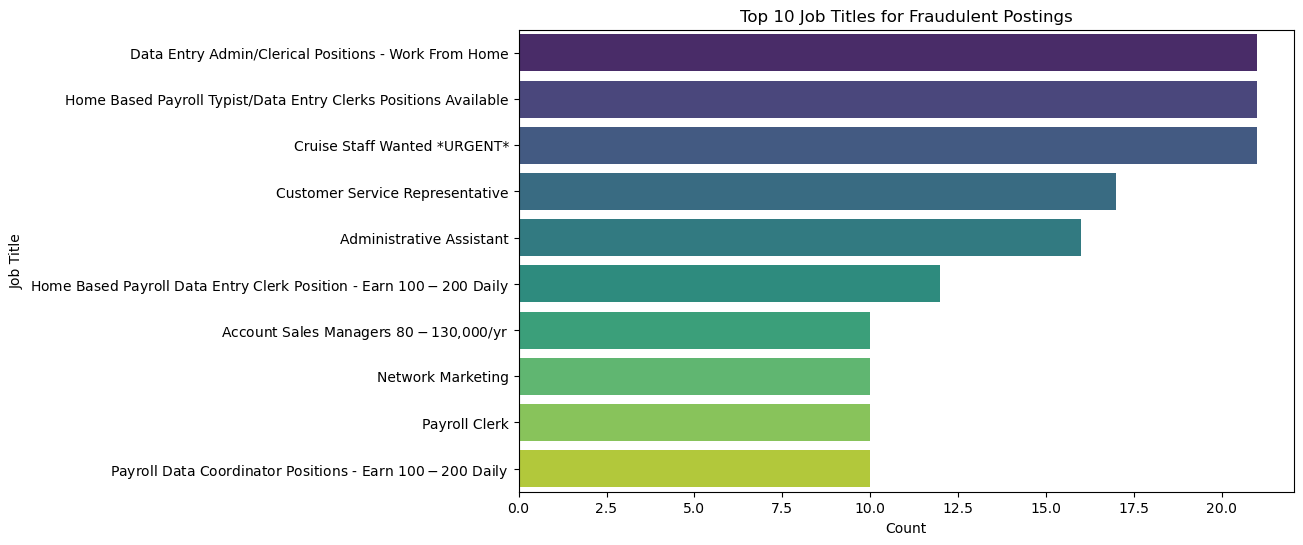

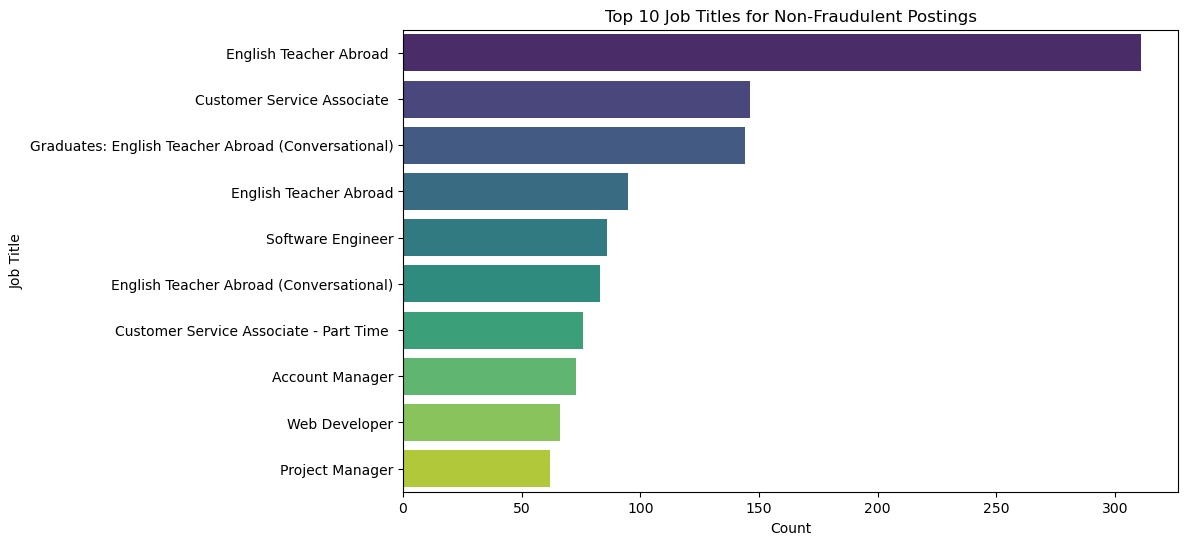

In [18]:
# Bivariate analysis of job titles for fraudulent and non-fraudulent postings
fraudulent_titles = df[df['fraudulent'] == 1]['title']
non_fraudulent_titles = df[df['fraudulent'] == 0]['title']

# Get the top 10 job titles for fraudulent postings
top_fraudulent_titles = fraudulent_titles.value_counts().head(10)

# Display the distribution of the top 10 job titles for fraudulent postings
plt.figure(figsize=(10, 6))
sns.barplot(x=top_fraudulent_titles.values, y=top_fraudulent_titles.index, palette='viridis')
plt.title('Top 10 Job Titles for Fraudulent Postings')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

# Get the top 10 job titles for non-fraudulent postings
top_non_fraudulent_titles = non_fraudulent_titles.value_counts().head(10)

# Display the distribution of the top 10 job titles for non-fraudulent postings
plt.figure(figsize=(10, 6))
sns.barplot(x=top_non_fraudulent_titles.values, y=top_non_fraudulent_titles.index, palette='viridis')
plt.title('Top 10 Job Titles for Non-Fraudulent Postings')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

From the job titles, we notice that fraudulent titles are distinctly different from the non-fraudulent titles, and it may incorporate some information that are uncommon for users to observe in a job title. Thus, it is important to note this difference and incorporate methods to try and identify this text information as features in the models.

##### Next, we look to explore the difference in percentage of fraud for the employment_type column

                 Occurrences  Percentage of Fraudulent
employment_type                                       
Part-time                797                  0.092848
Other                    227                  0.066079
Full-time              11620                  0.042169
Contract                1524                  0.028871
Temporary                241                  0.008299


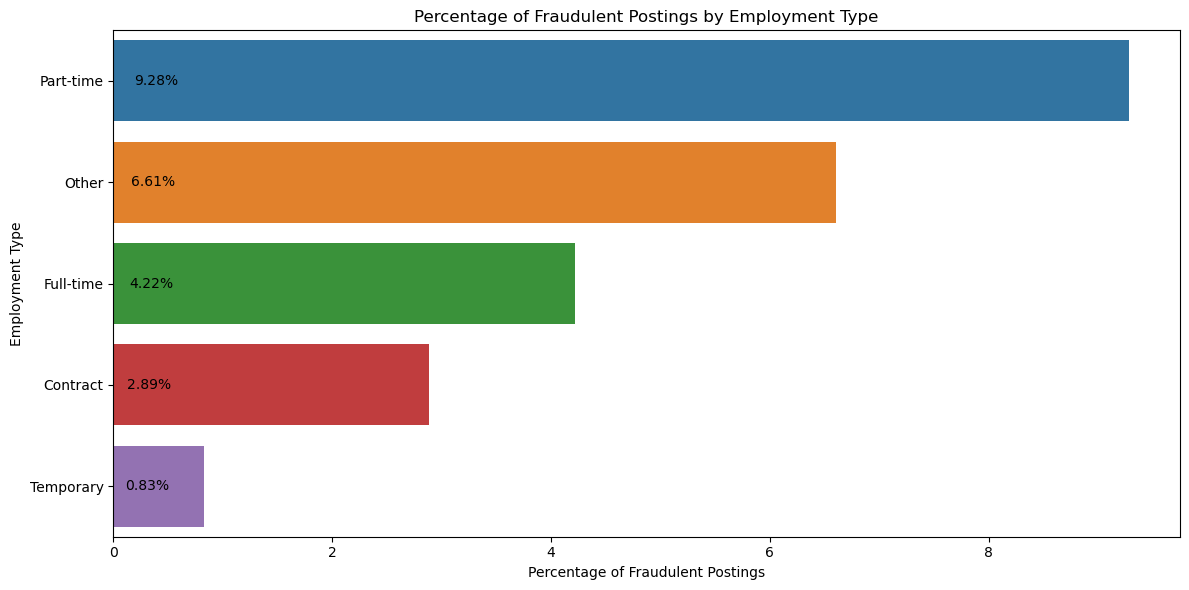

In [19]:
# Calculate the percentage of fraud for the 'employment_type' column
employment_type_fraud = data.groupby('employment_type')['fraudulent'].mean()

# Sort the data by the percentage of fraud in descending order
employment_type_fraud = employment_type_fraud.sort_values(ascending=False)

# Calculate the number of occurrences for each 'employment_type' category
employment_type_occurrences = data['employment_type'].value_counts()

result = pd.DataFrame({
    'Occurrences': employment_type_occurrences,
    'Percentage of Fraudulent': employment_type_fraud
})

result.sort_values(by='Percentage of Fraudulent', ascending=False, inplace=True)

print(result)

# Assuming employment_type_fraud is a pandas Series or DataFrame
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(y=employment_type_fraud.index, x=employment_type_fraud.values * 100)

# Add percentages to the bar
for i, value in enumerate(employment_type_fraud.values):
    ax.text(value + 0.1, i, f'{value:.2%}', va='center')

plt.ylabel('Employment Type')
plt.xlabel('Percentage of Fraudulent Postings')
plt.title('Percentage of Fraudulent Postings by Employment Type')
plt.tight_layout()

# Display the plot
plt.show()

From our observations, we note that part-time positions have higher percentage of being fraudulent. Thus, the employment type feature may be an important feature to include as well.

##### Next, we look to explore the relationship between fraudulent and industry column

                                     Occurrences
industry                                        
Information Technology and Services         1734
Computer Software                           1376
Internet                                    1062
Marketing and Advertising                    828
Education Management                         822
Financial Services                           779
Hospital & Health Care                       497
Consumer Services                            358
Telecommunications                           342
Oil & Energy                                 287


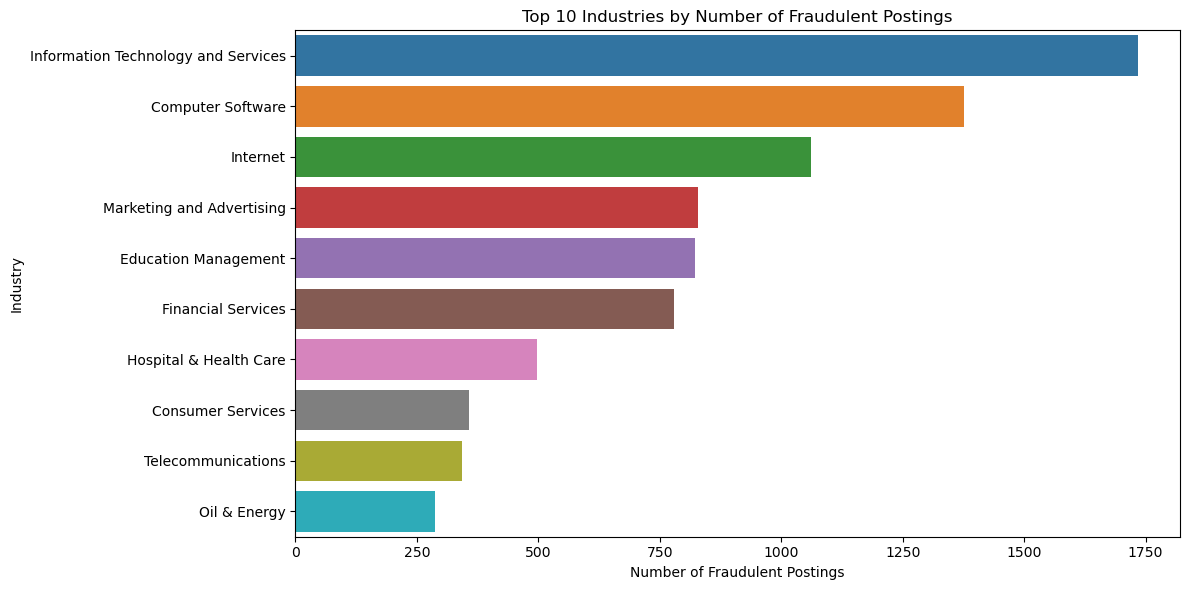

In [20]:
# Calculate the percentage of fraud for the 'industry' column
industry_fraud = data.groupby('industry')['fraudulent'].mean() * 100

# Count the number of occurrences for each of the top 10 industries
industry_occurrences = data['industry'].value_counts().loc[industry_fraud.index]

# Select the top 10 industries with the highest fraud percentages
top_10_industries = industry_occurrences.nlargest(10)


result = pd.DataFrame({
    'Occurrences': top_10_industries,
})

result.sort_values(by='Occurrences', ascending=False, inplace=True)

print(result)

# Create a bar plot to visualize the percentage of fraud for the top 10 industries
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_industries.index, x=top_10_industries.values)
plt.ylabel('Industry')
plt.xlabel('Number of Fraudulent Postings')
plt.title('Top 10 Industries by Number of Fraudulent Postings')
plt.tight_layout()

# Display the plot
plt.show()

Apparently, from our observations, the industry in which fraudulent postings are recorded are similar to the distribution of the industry column. 

##### Next, we explore the relationship between function and fraudulent columns

                      Occurrences  Percentage of Fraudulent
function                                                   
Administrative                630                 18.888889
Financial Analyst              33                 15.151515
Accounting/Auditing           212                 13.679245
Distribution                   24                 12.500000
Other                         325                  9.846154
Finance                       172                  8.720930
Engineering                  1348                  8.382789
Business Development          228                  5.701754
Advertising                    90                  5.555556
Project Management            183                  5.464481


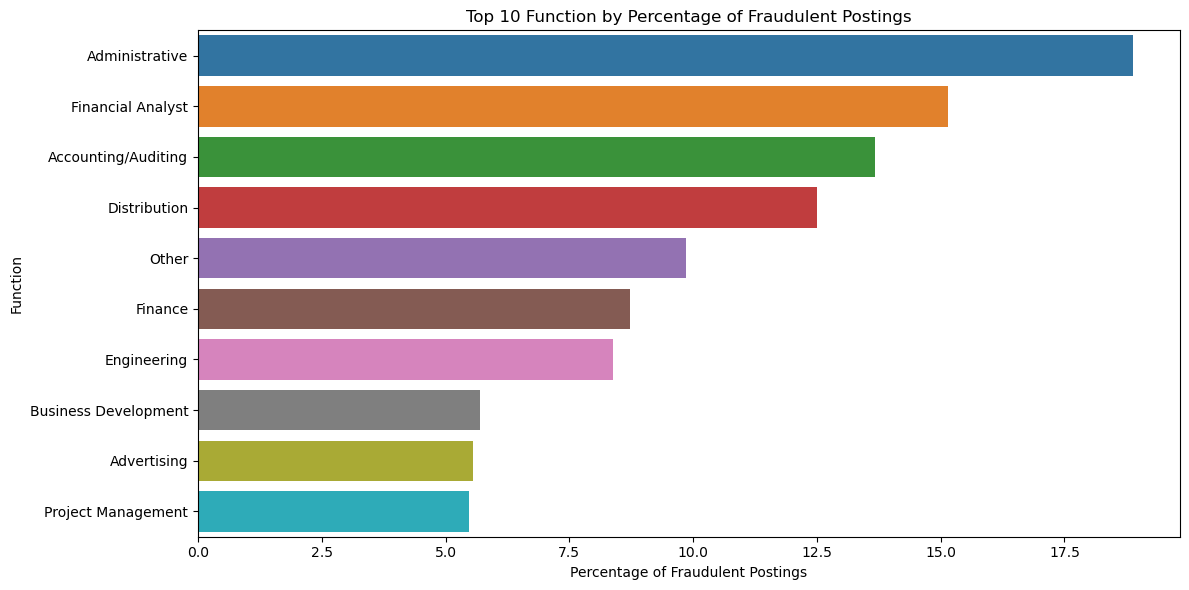

In [21]:
# Calculate the percentage of fraud for the 'function' column
function_fraud = data.groupby('function')['fraudulent'].mean() * 100

# Select the top 10 function with the highest fraud percentages
top_10_function = function_fraud.nlargest(10)

# Count the number of occurrences for each of the top 10 function
function_occurrences = data['function'].value_counts().loc[top_10_function.index]

result = pd.DataFrame({
    'Occurrences': function_occurrences,
    'Percentage of Fraudulent': top_10_function
})

print(result)

# Create a bar plot to visualize the percentage of fraud for the top 10 function
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_function.index, x=top_10_function.values)
plt.ylabel('Function')
plt.xlabel('Percentage of Fraudulent Postings')
plt.title('Top 10 Function by Percentage of Fraudulent Postings')
plt.tight_layout()

# Display the plot
plt.show()

From our observations, administrative staff, financial analyst and accounting roles have higher percentage of being fraudulent as compared to the others. This is different from the distribution of the function column, and may infer some hidden information in the data. Thus, function may be an important feature in our model trainings. 

##### Lets explore the relationship between fraudulent and required_experience column

                     Occurrences  Percentage of Fraudulent
required_experience                                       
Associate                   2297                  1.828472
Director                     389                  4.370180
Entry level                 2697                  6.637004
Executive                    141                  7.092199
Internship                   381                  2.624672
Mid-Senior level            3809                  2.966658
Not Applicable              1116                  5.376344


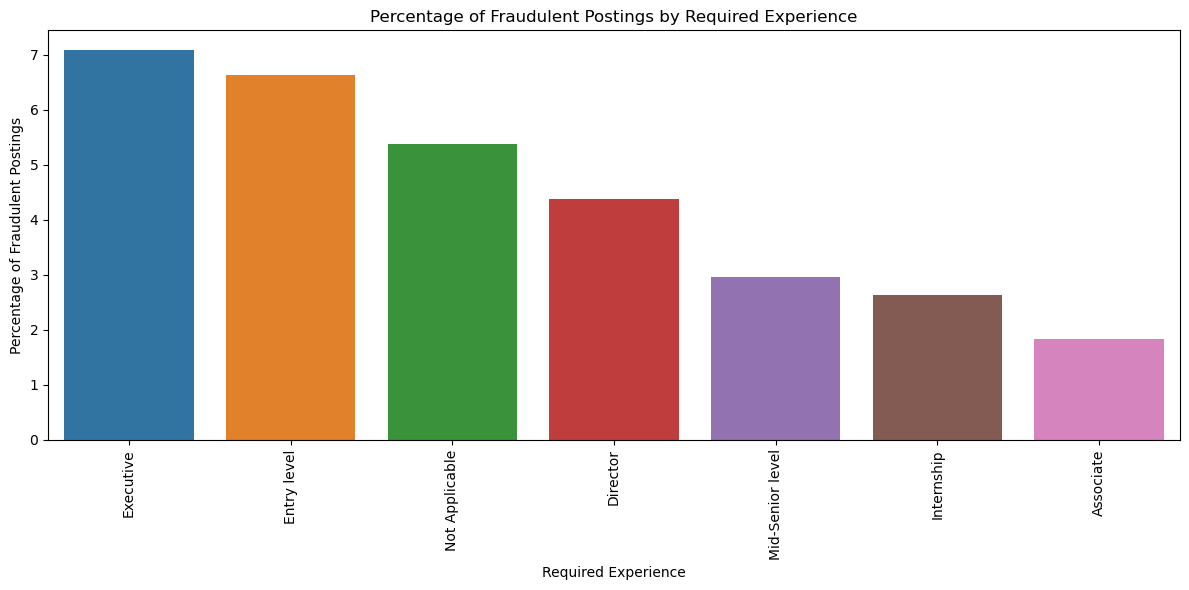

In [22]:
# Calculate the percentage of fraud for the 'required_experience' column
required_experience_fraud = data.groupby('required_experience')['fraudulent'].mean() * 100

# Sort the data by the percentage of fraud in descending order
required_experience_fraud = required_experience_fraud.sort_values(ascending=False)

# Calculate the number of occurrences for each 'required_experience' category
experience_occurrences = data['required_experience'].value_counts()

result = pd.DataFrame({
    'Occurrences': experience_occurrences,
    'Percentage of Fraudulent': required_experience_fraud
})

print(result)

# Create a bar plot to visualize the percentage of fraud for each required_experience
plt.figure(figsize=(12, 6))
sns.barplot(x=required_experience_fraud.index, y=required_experience_fraud.values)
plt.xlabel('Required Experience')
plt.ylabel('Percentage of Fraudulent Postings')
plt.title('Percentage of Fraudulent Postings by Required Experience')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

Overall, the executive, entry level and not applicable required experience types have higher percentage of being a fraud. Thus, we may want to incorporate the column as a feature for our model. 

##### lets explore the relationship between required education and fraudulent

                                   Occurrences  Percentage of Fraudulent
required_education                                                      
Associate Degree                           274                  2.189781
Bachelor's Degree                         5145                  1.943635
Certification                              170                 11.176471
Doctorate                                   26                  3.846154
High School or equivalent                 2080                  8.173077
Master's Degree                            416                  7.451923
Professional                                74                  5.405405
Some College Coursework Completed          102                  2.941176
Some High School Coursework                 27                 74.074074
Unspecified                               1397                  4.366500
Vocational                                  49                  0.000000
Vocational - Degree                          6     

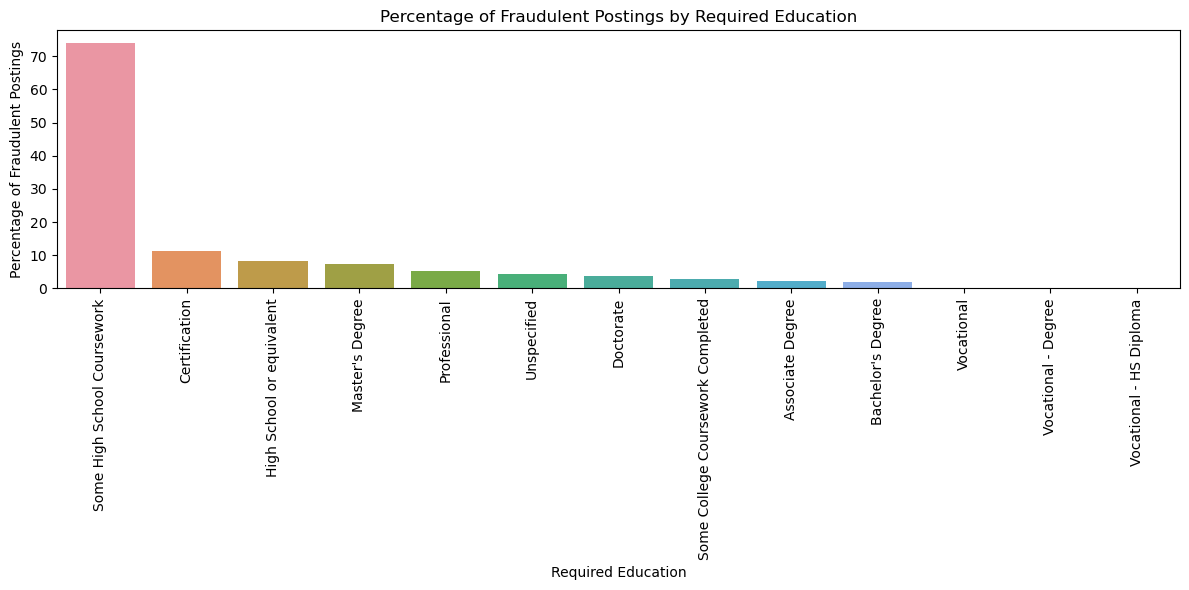

In [23]:
# Calculate the percentage of fraud for the 'required_education' column
required_education_fraud = data.groupby('required_education')['fraudulent'].mean() * 100

# Sort the data by the percentage of fraud in descending order
required_education_fraud = required_education_fraud.sort_values(ascending=False)

# Calculate the number of occurrences for each 'required_education' category
education_occurrences = data['required_education'].value_counts()

result = pd.DataFrame({
    'Occurrences': education_occurrences,
    'Percentage of Fraudulent': required_education_fraud
})

print(result)

# Create a bar plot to visualize the percentage of fraud for each required_education
plt.figure(figsize=(12, 6))
sns.barplot(x=required_education_fraud.index, y=required_education_fraud.values)
plt.xlabel('Required Education')
plt.ylabel('Percentage of Fraudulent Postings')
plt.title('Percentage of Fraudulent Postings by Required Education')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

Based on our observations, we notice that postings with High School, certification and master's degree as required education level has the highest fraud percentage. Thus, it may be beneficial to add the column as a feature in our models. 

##### Next, lets explore the title and description columns and see what are the most commonly used tokens in their descriptions in fraudulent and non-fraudulent categories.

In [26]:
# !pip install wordcloud # install packages

     -------------------------------------- 153.3/153.3 kB 9.5 MB/s eta 0:00:00


In [27]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jason\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

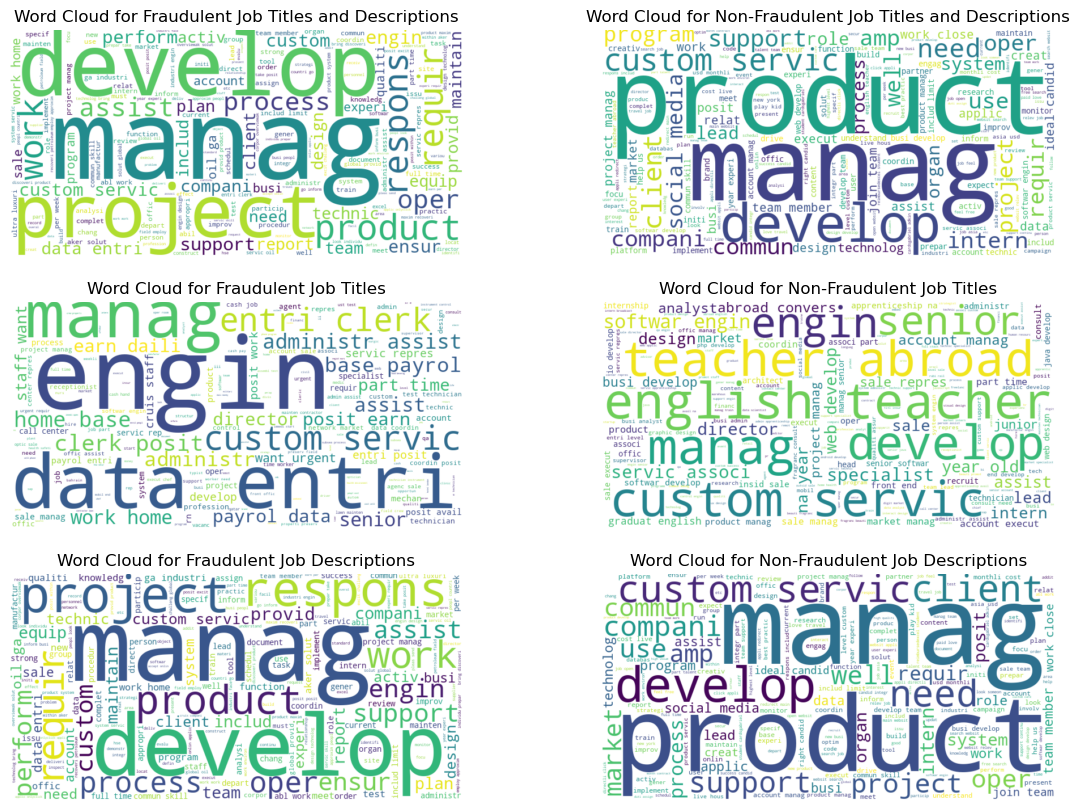

In [28]:
# Preprocess the "title" and "description" columns
df['title'] = df['title'].astype(str).fillna('')
df['description'] = df['description'].astype(str).fillna('')

# Combine title and description for each category (fraudulent and non-fraudulent)
fraudulent_text = ' '.join(df[df['fraudulent'] == 1]['title'] + ' ' + df[df['fraudulent'] == 1]['description'])
non_fraudulent_text = ' '.join(df[df['fraudulent'] == 0]['title'] + ' ' + df[df['fraudulent'] == 0]['description'])

# Separate titles and descriptions for fraudulent and non-fraudulent postings
fraudulent_titles = ' '.join(df[df['fraudulent'] == 1]['title'])
non_fraudulent_titles = ' '.join(df[df['fraudulent'] == 0]['title'])
fraudulent_descriptions = ' '.join(df[df['fraudulent'] == 1]['description'])
non_fraudulent_descriptions = ' '.join(df[df['fraudulent'] == 0]['description'])

# Define a function for text preprocessing
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()

    # Lowercasing and tokenization
    words = word_tokenize(text.lower())

    # Removing stopwords and stemming
    words = [ps.stem(word) for word in words if word.isalpha() and word not in stop_words]

    return ' '.join(words)

# Apply text preprocessing to both categories
fraudulent_text = preprocess_text(fraudulent_text)
non_fraudulent_text = preprocess_text(non_fraudulent_text)

# Apply text preprocessing to titles
fraudulent_titles = preprocess_text(fraudulent_titles)
non_fraudulent_titles = preprocess_text(non_fraudulent_titles)

# Apply text preprocessing to descriptions
fraudulent_descriptions = preprocess_text(fraudulent_descriptions)
non_fraudulent_descriptions = preprocess_text(non_fraudulent_descriptions)

# Generate word clouds
wordcloud_fraudulent = WordCloud(width=800, height=400, background_color='white').generate(fraudulent_text)
wordcloud_non_fraudulent = WordCloud(width=800, height=400, background_color='white').generate(non_fraudulent_text)

# Generate word clouds for fraudulent and non-fraudulent job titles
wordcloud_fraudulent_titles = WordCloud(width=800, height=400, background_color='white').generate(fraudulent_titles)
wordcloud_non_fraudulent_titles = WordCloud(width=800, height=400, background_color='white').generate(non_fraudulent_titles)

# Generate word clouds for fraudulent and non-fraudulent job descriptions
wordcloud_fraudulent_descriptions = WordCloud(width=800, height=400, background_color='white').generate(fraudulent_descriptions)
wordcloud_non_fraudulent_descriptions = WordCloud(width=800, height=400, background_color='white').generate(non_fraudulent_descriptions)

# Plot the word clouds
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.imshow(wordcloud_fraudulent, interpolation='bilinear')
plt.title('Word Cloud for Fraudulent Job Titles and Descriptions')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(wordcloud_non_fraudulent, interpolation='bilinear')
plt.title('Word Cloud for Non-Fraudulent Job Titles and Descriptions')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(wordcloud_fraudulent_titles, interpolation='bilinear')
plt.title('Word Cloud for Fraudulent Job Titles')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(wordcloud_non_fraudulent_titles, interpolation='bilinear')
plt.title('Word Cloud for Non-Fraudulent Job Titles')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(wordcloud_fraudulent_descriptions, interpolation='bilinear')
plt.title('Word Cloud for Fraudulent Job Descriptions')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(wordcloud_non_fraudulent_descriptions, interpolation='bilinear')
plt.title('Word Cloud for Non-Fraudulent Job Descriptions')
plt.axis('off')

plt.show()

In particular, we notice some tokens that are more commonly found in titles and descriptions that are fraudulent, such as 'data entri', 'clerk' and 'respons'. Thus, it is important to incorporate the text as features in our models such that we are able to capture these information.

##### Next lets explore the company profile, requirements and benefits columns as well.

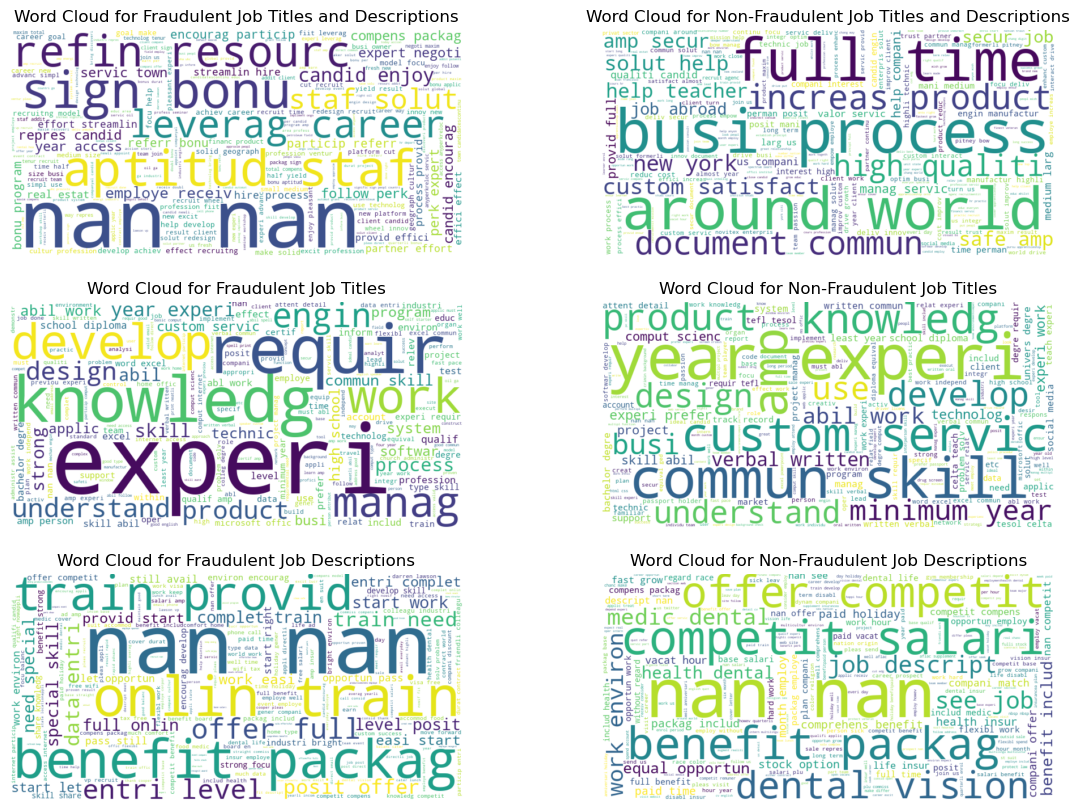

In [30]:
# Preprocess the "company_profile", "requirements" and "benefits" columns
df['company_profile'] = df['company_profile'].fillna('')
df['requirements'] = df['requirements'].fillna('')
df['benefits'] = df['benefits'].fillna('')

#  and description for each category (fraudulent and non-fraudulent)
fraudulent_profile = ' '.join(df[df['fraudulent'] == 1]['company_profile'])
non_fraudulent_profile = ' '.join(df[df['fraudulent'] == 0]['company_profile'])
fraudulent_req = ' '.join(df[df['fraudulent'] == 1]['requirements'])
non_fraudulent_req = ' '.join(df[df['fraudulent'] == 0]['requirements'])
fraudulent_benefits = ' '.join(df[df['fraudulent'] == 1]['benefits'])
non_fraudulent_benefits = ' '.join(df[df['fraudulent'] == 0]['benefits'])

# Apply text preprocessing to both categories
fraudulent_profile = preprocess_text(fraudulent_profile)
non_fraudulent_profile = preprocess_text(non_fraudulent_profile)

# Apply text preprocessing to titles
fraudulent_req = preprocess_text(fraudulent_req)
non_fraudulent_req = preprocess_text(non_fraudulent_req)

# Apply text preprocessing to descriptions
fraudulent_benefits = preprocess_text(fraudulent_benefits)
non_fraudulent_benefits = preprocess_text(non_fraudulent_benefits)

# Generate word clouds
wordcloud_fraudulent = WordCloud(width=800, height=400, background_color='white').generate(fraudulent_profile)
wordcloud_non_fraudulent = WordCloud(width=800, height=400, background_color='white').generate(non_fraudulent_profile)

# Generate word clouds for fraudulent and non-fraudulent job titles
wordcloud_fraudulent_titles = WordCloud(width=800, height=400, background_color='white').generate(fraudulent_req)
wordcloud_non_fraudulent_titles = WordCloud(width=800, height=400, background_color='white').generate(non_fraudulent_req)

# Generate word clouds for fraudulent and non-fraudulent job descriptions
wordcloud_fraudulent_descriptions = WordCloud(width=800, height=400, background_color='white').generate(fraudulent_benefits)
wordcloud_non_fraudulent_descriptions = WordCloud(width=800, height=400, background_color='white').generate(non_fraudulent_benefits)

# Plot the word clouds
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.imshow(wordcloud_fraudulent, interpolation='bilinear')
plt.title('Word Cloud for Fraudulent Job Titles and Descriptions')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(wordcloud_non_fraudulent, interpolation='bilinear')
plt.title('Word Cloud for Non-Fraudulent Job Titles and Descriptions')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(wordcloud_fraudulent_titles, interpolation='bilinear')
plt.title('Word Cloud for Fraudulent Job Titles')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(wordcloud_non_fraudulent_titles, interpolation='bilinear')
plt.title('Word Cloud for Non-Fraudulent Job Titles')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(wordcloud_fraudulent_descriptions, interpolation='bilinear')
plt.title('Word Cloud for Fraudulent Job Descriptions')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(wordcloud_non_fraudulent_descriptions, interpolation='bilinear')
plt.title('Word Cloud for Non-Fraudulent Job Descriptions')
plt.axis('off')

plt.show()

test avs